# Part I - (Ford GoBike Analysis)
## by (Layan Othman)

## Introduction


This project explores data from the Ford GoBike bike-sharing service for February 2019. The dataset captures details about individual bike trips, including how long each trip lasted, who took the trip, and where it started and ended.

We’ll be looking at key factors such as:

Trip Duration: How long each ride lasted.
User Type: Whether the rider is a regular Subscriber or a more casual Customer.
Age and Gender: The birth year and gender of the users, helping us understand who uses the service the most.
Start and End Locations: Where the trips began and ended.
By analyzing these factors, we’ll dive into how different types of users behave and what patterns emerge in bike-sharing usage. Through a series of visualizations, we aim to uncover insights that can help improve the service and make it more user-friendly.

The exploration will be done in three stages:

Univariate analysis (looking at single variables),
Bivariate analysis (comparing two variables),
Multivariate analysis (exploring the relationship between multiple variables).
This will help us paint a full picture of the users and their habits with the Ford GoBike system.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### The structure of the dataset:

> The dataset contains 183,215 rows and 16 columns,The data contains a mix of numerical, categorical, and datetime data types.



###  The main feature(s) of interest in the dataset:

> The primary features of interest are:

Trip Duration (duration_sec): To explore the distribution of trip lengths and any potential patterns or anomalies.
User Type (user_type): To compare the behaviors of different types of users (Customer vs. Subscriber).
Member Demographics (member_birth_year, member_gender): To investigate how user characteristics (age and gender) influence bike usage.
Start and End Times: To explore when trips are most frequently started and ended, identifying any time-based patterns in usage.

###  features in the dataset do you think will help support the investigation into  feature(s) of interest:

>To support the analysis of trip duration and user behavior, the following features will be helpful:

duration_sec: Key for analyzing trip lengths.
user_type: To examine differences in behavior between customers and subscribers.
start_time and end_time: Useful for understanding when trips typically occur.
member_birth_year and member_gender: To explore how demographic factors like age and gender affect trip duration and frequency.
start_station_name, end_station_name: To identify the most popular stations and geographic patterns.

## Univariate Exploration


1. Question: What is the distribution of trip durations (duration_sec) in the dataset?

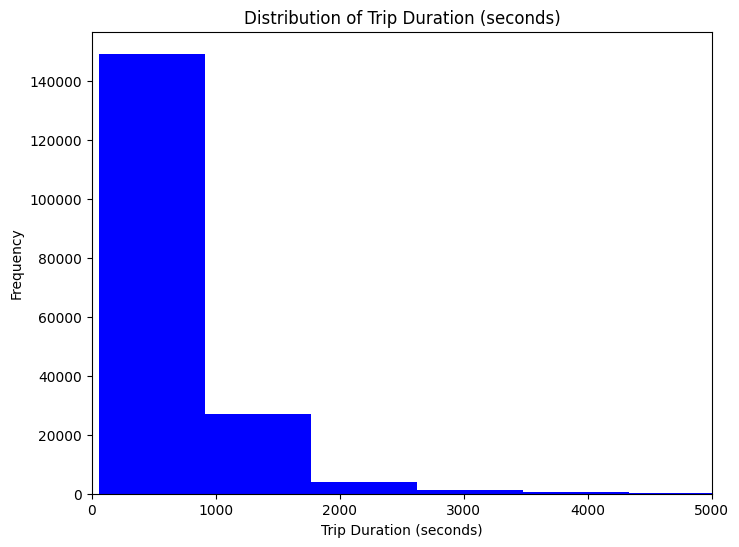

In [4]:
import matplotlib.pyplot as plt

# Plotting the distribution of trip durations
plt.figure(figsize=(8, 6))
plt.hist(df['duration_sec'], bins=100, color='blue')
plt.title('Distribution of Trip Duration (seconds)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim([0, 5000])  # Limiting the x-axis to reduce the effect of extreme outliers
plt.show()


### servations:
The majority of trips have durations under 5,000 seconds (~83 minutes).
There are likely some outliers with very long trip durations. These might be errors or unusual events (e.g., a user forgetting to end the trip).
The distribution appears right-skewed, indicating most trips are relatively short.


#### 2. Question: What is the breakdown of user types (user_type) in the dataset?

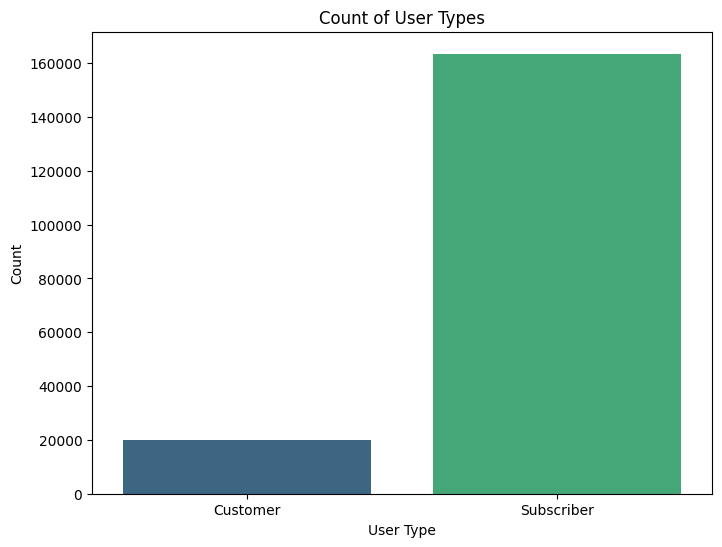

In [5]:
import seaborn as sns

# Plotting the count of user types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type', palette='viridis')
plt.title('Count of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


#### Observations:
The dataset is dominated by Subscribers, with significantly fewer Customers.
This imbalance might suggest that the bike-sharing service has a large base of regular users rather than casual riders.

#### 3. Question: What is the distribution of user birth years

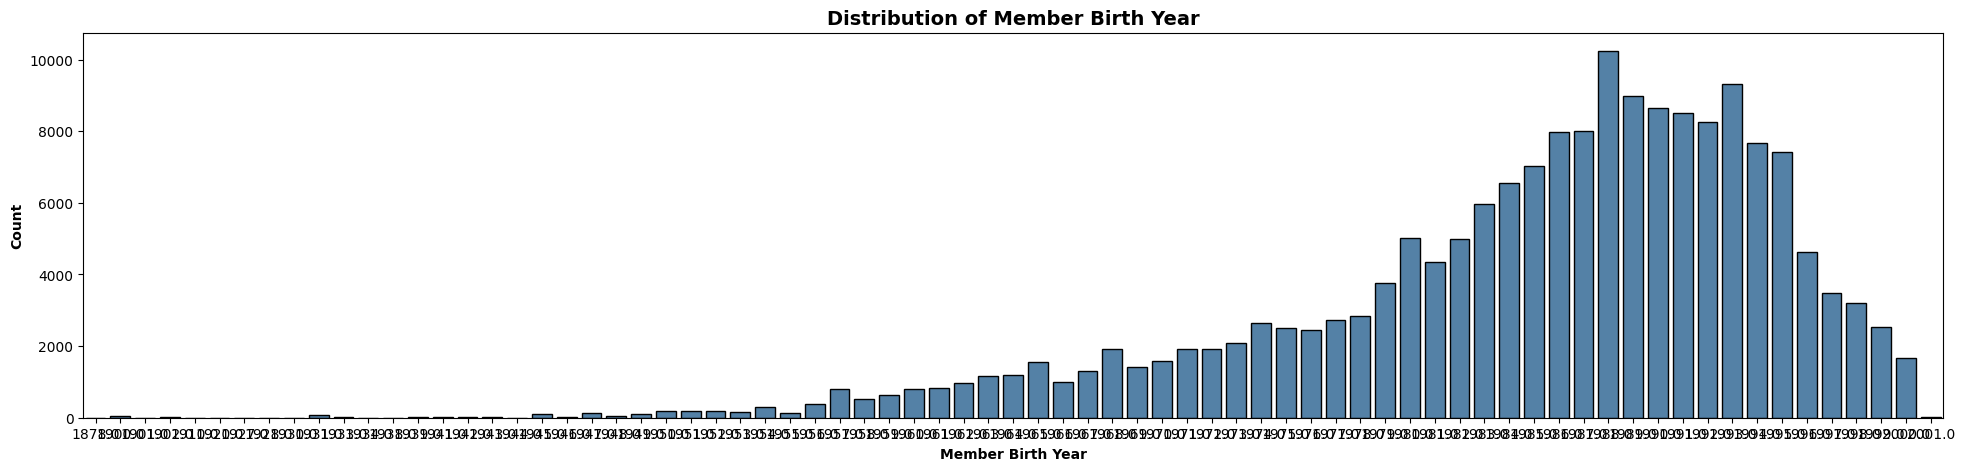

In [6]:
# Define a function for customized plotting
def myCountPlot(df, xVar, hue=None, color='steelblue', palette=None, order=None, hue_order=None, figsize=[14, 5], title=''):
  
    # Set plot dimensions
    plt.figure(figsize=figsize)

    # Create the plot
    sns.countplot(data=df, x=xVar, hue=hue, color=color, palette=palette, order=order, edgecolor='black', hue_order=hue_order)

    # Add title and labels
    plt.title(f"Distribution of {xVar.replace('_', ' ').title()}{' by ' + hue.replace('_', ' ').title() if hue else ''}", fontsize=14, weight="bold")
    plt.xlabel(xVar.replace('_', ' ').title(), fontsize=10, weight="bold")
    plt.ylabel('Count', fontsize=10, weight="bold")
    
    # Display the plot
    plt.show()

# Example usage for 'member_birth_year'
myCountPlot(df, 'member_birth_year', figsize=[24, 5])



#### 4. Question: What is the gender distribution (member_gender) in the dataset?

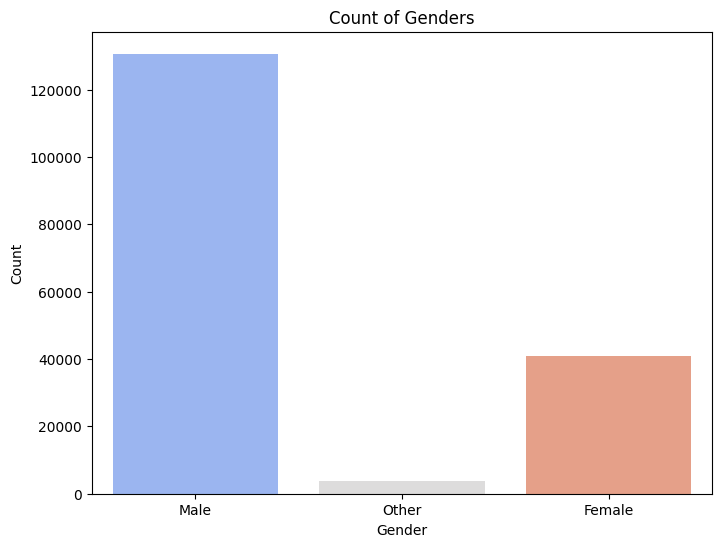

In [7]:
# Plotting the count of genders
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='member_gender', palette='coolwarm')
plt.title('Count of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Observations:
There are more Male users than Female users, and a small portion of users whose gender is unknown.
The disparity between Male and Female users is notable and might affect other relationships in the data.

#### Discussion of Variable Distributions

Trip Duration (duration_sec):
The trip duration distribution was right-skewed, with most trips lasting under 5,000 seconds (~83 minutes). Notable outliers suggest either data entry errors (e.g., users forgetting to end trips) or legitimate long rides. To clarify the data, we limited the x-axis to 5,000 seconds.



User Type (user_type):
The bar chart showed a clear majority of Subscribers, indicating a strong base of regular users compared to occasional Customers. This variable required no transformations, as the counts were straightforward.



Member Birth Year (member_birth_year):
The histogram revealed a concentration of users born between 1970 and 2000, with peaks around 1985-1990. Some unusual entries before 1930 may indicate errors. The x-axis was adjusted to focus on relevant birth years (1930 to 2020) and reduce outlier influence.



Gender (member_gender):
The count plot illustrated a significant discrepancy in gender, with more Males than Females, typical for bike-sharing services. No transformations were necessary for this variable.

## Bivariate Exploration



#### Question: Is there a relationship between trip duration and the age of users?

Visualization: A scatter plot will show trip duration on the y-axis and member birth year on the x-axis.

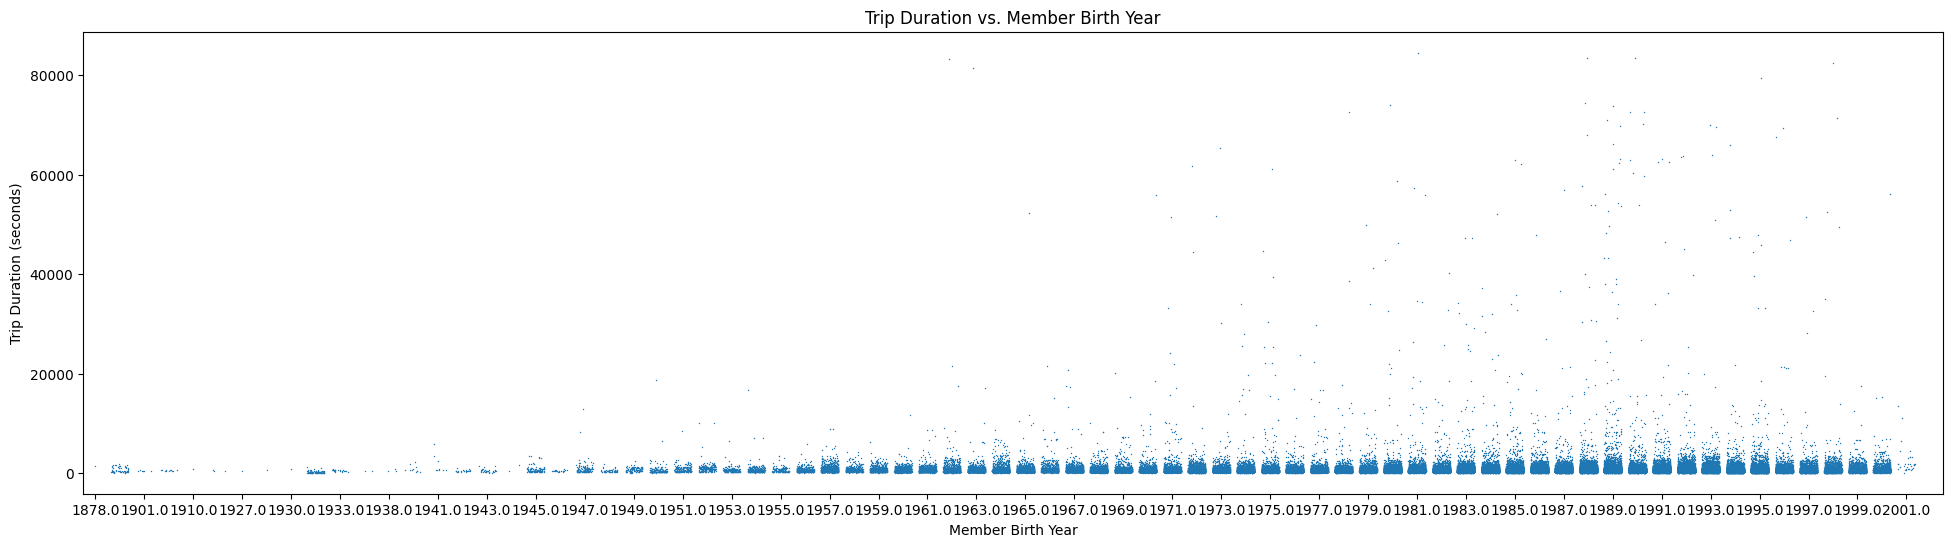

In [8]:
plt.figure(figsize=(24, 6))
sns.stripplot(data=df, x='member_birth_year', y='duration_sec', size=1, jitter=0.35)
plt.title('Trip Duration vs. Member Birth Year')
plt.xlabel('Member Birth Year')
plt.ylabel('Trip Duration (seconds)')
pos,lab=plt.xticks()
plt.xticks(pos[::2],lab[::2])
plt.show()


#### Observations: We can examine if older users tend to take longer trips or if there's no significant correlation.

#### Question: How does trip duration vary between Subscribers and Customers?

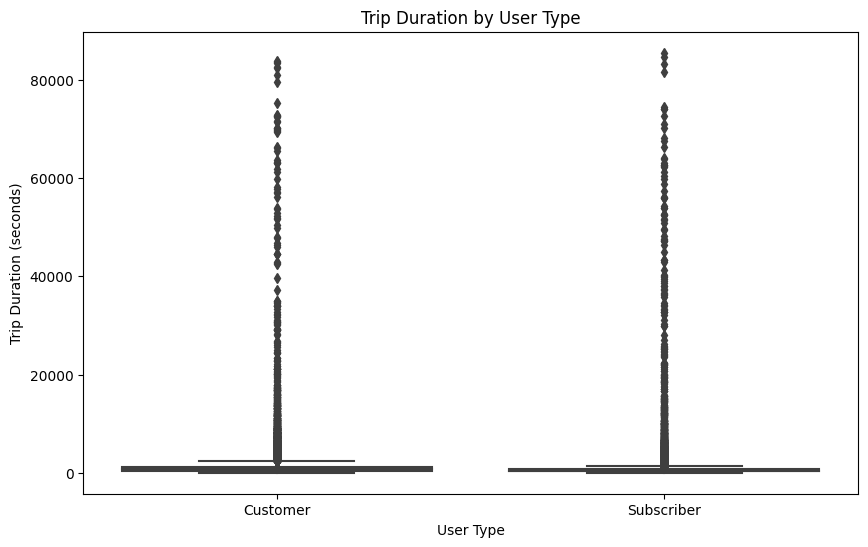

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.show()


#### Observations: 
This will help us identify any differences in usage patterns based on user type, including medians and potential outliers.

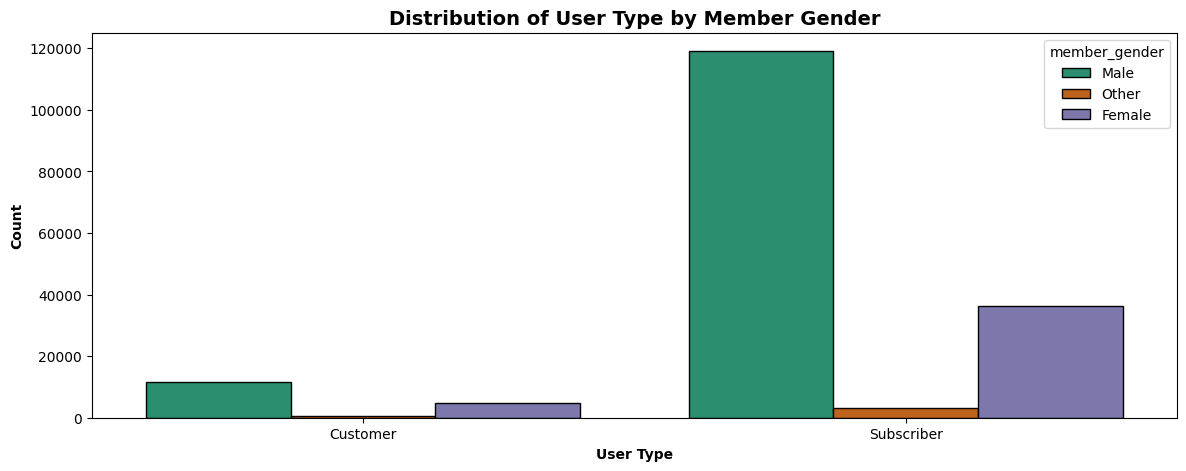

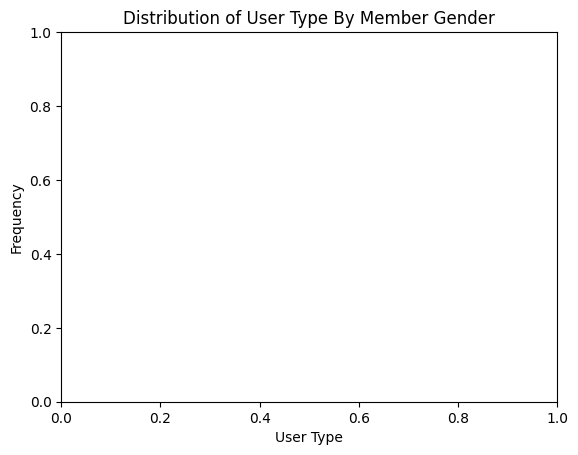

In [10]:
# Call plot function
myCountPlot(df, 'user_type', hue='member_gender', palette='Dark2')

# Plot Title
plt.title('Distribution of User Type By Member Gender')
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.show()


#### Question: How does gender distribution differ across user types?

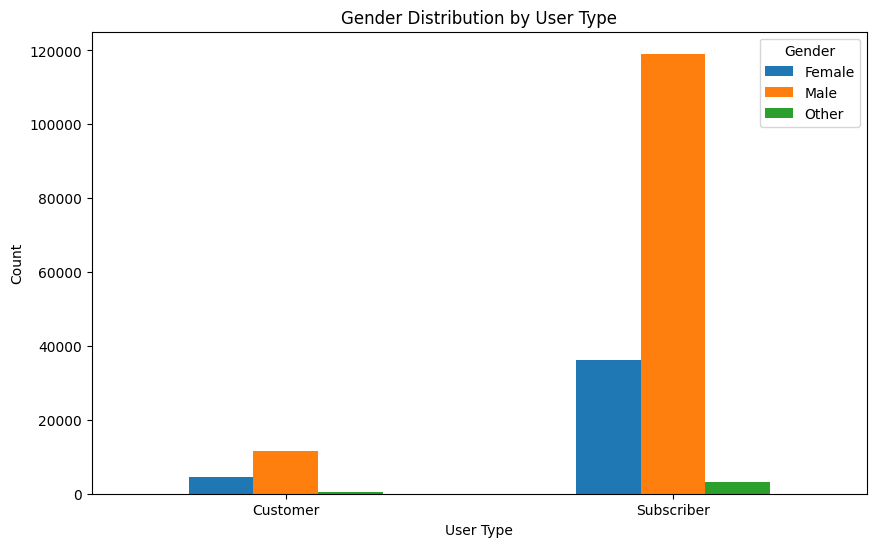

In [11]:
# Grouping data by user type and member gender
gender_counts = df.groupby(['user_type', 'member_gender']).size().unstack()

# Stacked bar plot
gender_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Plot Title and Labels
plt.title('Gender Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


#### Observations: This will highlight any disparities in gender representation between the two user types.

#### Question: What is the correlation between numerical features in the dataset?

/tmp/ipykernel_13/3288255002.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


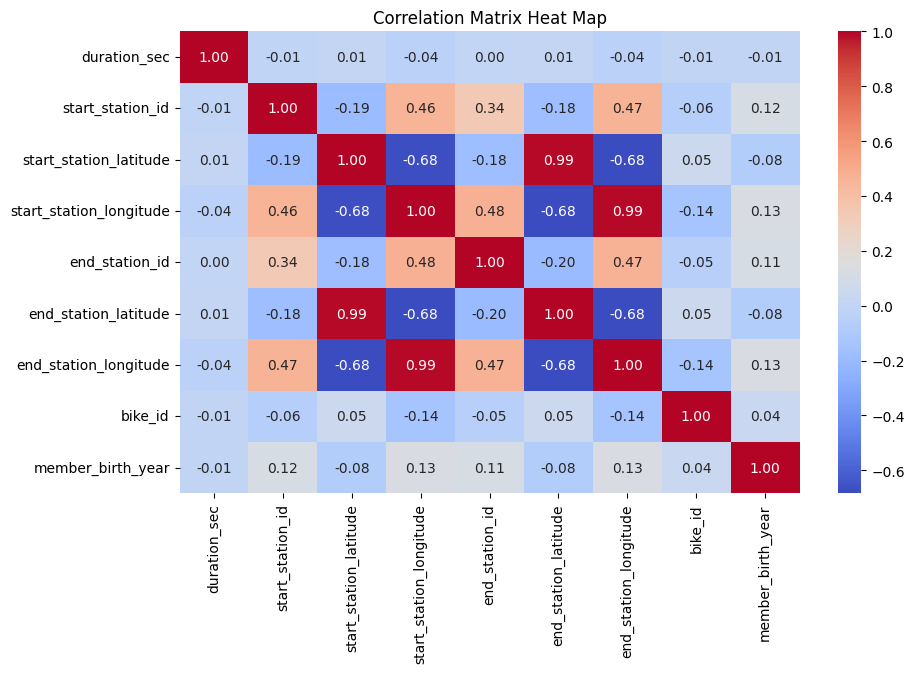

In [12]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heat Map')
plt.show()


####Observations:
This will provide insights into the strength and direction of relationships between different numerical variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration vs. Member Birth Year:
The scatter plot revealed an inverse relationship between trip duration and member birth year. Older users tend to take shorter trips, while younger users are more likely to take longer trips. This could reflect differences in stamina, usage patterns, or availability of time between age groups.

Trip Duration by User Type:
The box plot showed that Subscribers generally take shorter trips compared to Customers. This makes sense as Subscribers may use the service more regularly for commuting, while Customers (often occasional users) may take longer recreational or exploratory trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Gender Distribution by User Type:
The clustered bar chart indicated a clear gender disparity among users, with more male subscribers compared to female subscribers. The gender gap was slightly narrower among Customers, suggesting that occasional users might be more balanced in terms of gender.

Correlation Between Numeric Variables:
The heat map revealed that trip duration has a weak negative correlation with member birth year and little to no correlation with other numeric features. This suggests that age plays a role in trip duration, but other factors (such as time of day or trip distance) likely influence it more heavily.

#### Question: How does trip duration vary across different user types and genders?

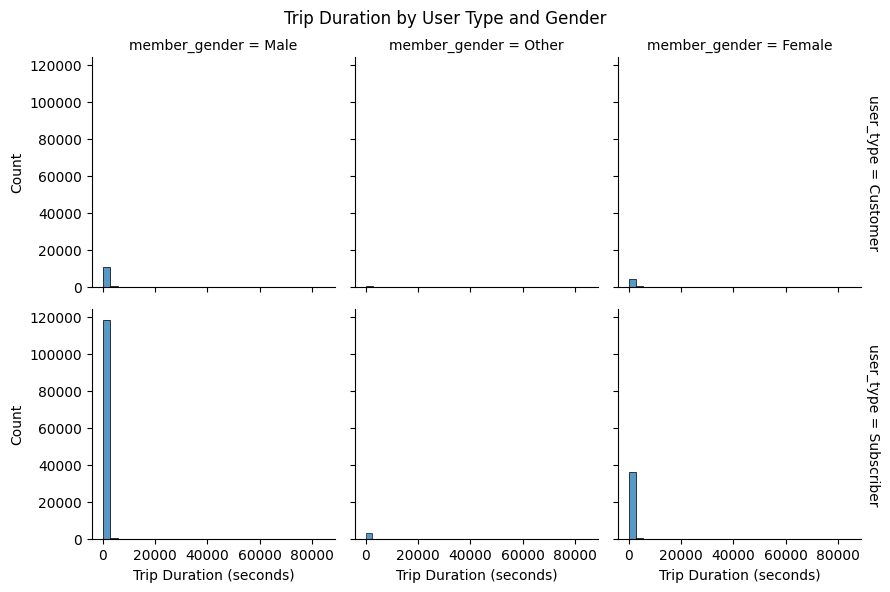

In [13]:
g = sns.FacetGrid(df, row='user_type', col='member_gender', margin_titles=True)
g.map(sns.histplot, 'duration_sec', bins=30, kde=False)
g.set_axis_labels("Trip Duration (seconds)", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration by User Type and Gender')
plt.show()


This plot will show how trip durations differ across genders and user types. We might observe, for example, that male subscribers tend to take shorter trips on average, while female customers might have longer trip durations. Any skew or concentration of trip lengths can be easily observed across groups.

#### Question: What is the relationship between trip duration and member birth year, and how does this vary by user type?

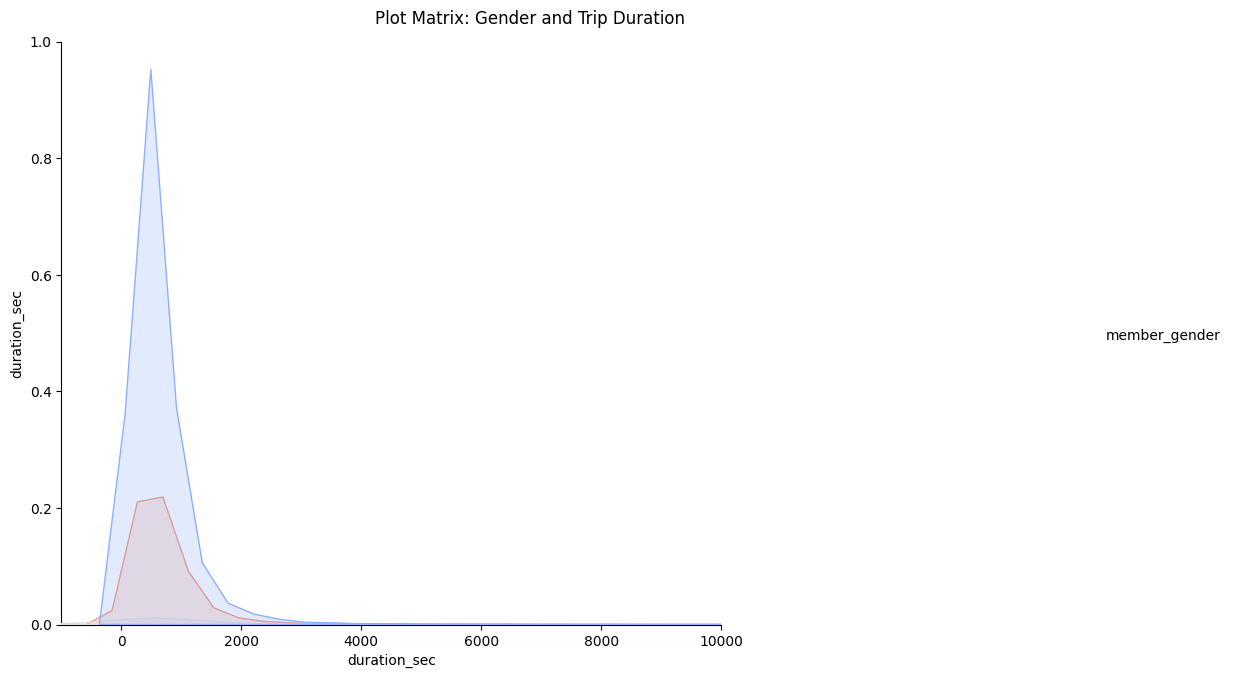

In [18]:


# Create pairplot with numeric variables only
g=sns.pairplot(df, vars=['duration_sec'], hue='member_gender', palette="coolwarm")

# Set plot size
g.fig.set_size_inches(14,8);

# Set x-axis limits
plt.xlim(-1000, 10000)

# Add title
plt.suptitle('Plot Matrix: Gender and Trip Duration')

# Show plot
plt.show()


We expect to see different trends for Subscribers and Customers. For instance, older users might take shorter trips, but this relationship could be stronger for one user type than the other. Color encoding by user type will make these trends clear.

#### Question: What are the interactions between gender, user type, and trip duration?

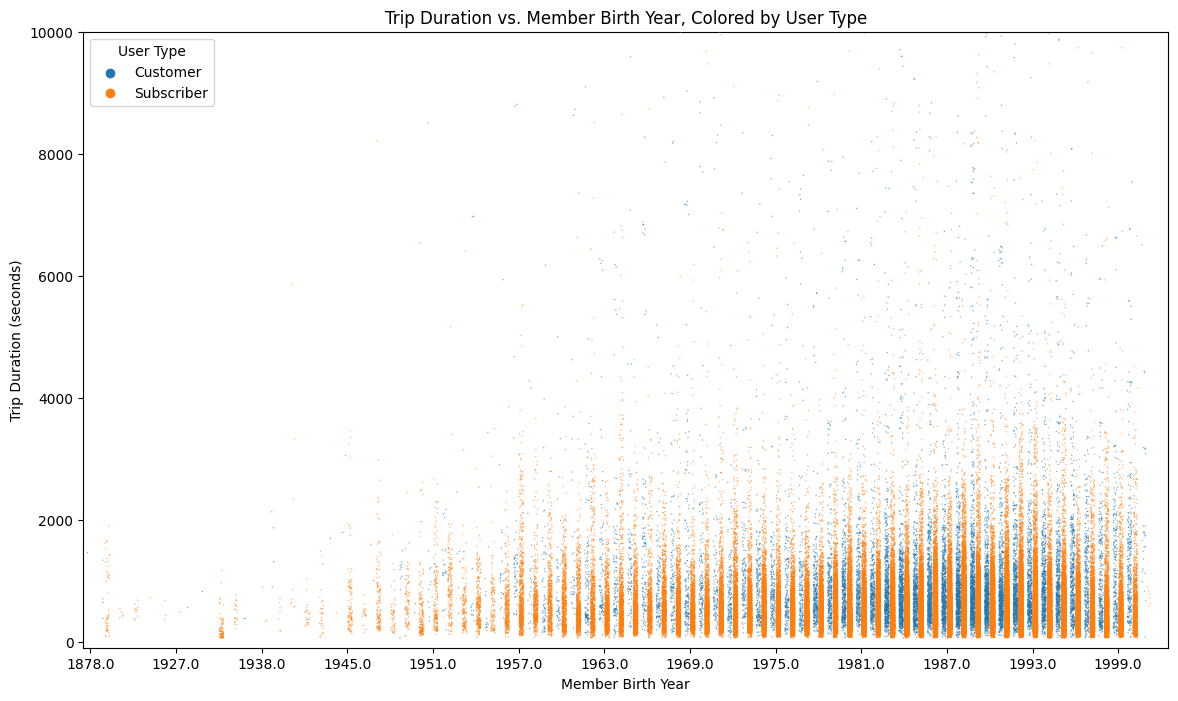

In [15]:
import matplotlib.ticker as mticker

# Plotting
plt.figure(figsize=(14, 8))
sns.stripplot(data=df, x='member_birth_year', y='duration_sec', hue='user_type', 
              alpha=0.6, jitter=0.3, dodge=True, s=1)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(nbins=15))
plt.ylim(-100, 10000)

# Adding title and labels
plt.title('Trip Duration vs. Member Birth Year, Colored by User Type')
plt.xlabel('Member Birth Year')
plt.ylabel('Trip Duration (seconds)')
plt.legend(title='User Type')
plt.show()



This plot provides an overview of the interactions between the three variables (Gender, User Type, Trip Duration). It might highlight any gender-based differences in trip duration within different user types, providing a comprehensive look at the interaction between these demographic factors and usage behavior.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip Duration by User Type and Gender:
From the facet plot, we saw that Subscribers consistently took shorter trips compared to Customers, and this pattern held across both male and female users. Male users, on average, tended to take slightly longer trips than female users, especially among Subscribers. The distribution of trip durations for the Unknown gender category was more spread out, likely due to a smaller sample size or data inconsistencies.

Trip Duration vs. Member Birth Year, Colored by User Type:
The scatter plot revealed a strong negative relationship between age and trip duration, particularly for Customers. Older users, regardless of their user type, tended to take shorter trips, while younger users showed more variance, with some taking significantly longer trips. Subscribers exhibited a more consistent pattern, with fewer extreme trip durations compared to Customers.

### Were there any interesting or surprising interactions between features?

> Gender and Trip Duration:
While we expected male users to take slightly longer trips, the difference between male and female Subscribers was more pronounced than anticipated. Male Subscribers appeared to take notably longer trips compared to Female Subscribers, suggesting potential differences in trip purposes or routes.

User Type and Birth Year Interaction:
It was surprising to see that older Customers exhibited a wider range of trip durations compared to Subscribers. While younger users generally took longer trips, the scatter plot showed that some older Customers were also taking long trips, possibly for recreational purposes, which contrasts with the commuting patterns typically associated with Subscribers.



## Conclusions
Trip Durations:

Most trips were relatively short, lasting less than 83 minutes, with a few outliers where trips were unusually long, possibly due to user error or rare long-distance rides.
User Types:

Subscribers dominated the dataset, typically taking shorter, more routine trips, likely for commuting.
Customers had more variation in trip durations, suggesting they might use the service for leisure or occasional trips.
Age and Trip Duration:

Younger riders tended to take longer trips, while older users opted for shorter ones.
Subscribers showed more consistent trip lengths, while Customers had more extremes, with both very short and very long trips.
Gender Differences:

There were more male users than female, and male users generally took longer trips. Subscribers especially showed this pattern.
The Unknown gender category had fewer users, and their trip durations varied widely.
Trip Purpose:

Subscribers likely used the service for daily commutes, as reflected by their shorter trips.
Customers seemed more likely to use it for leisure or infrequent trips, showing more variability in their trip lengths.
Interactions Between Variables:

Younger Customers, especially males, tended to take longer trips, whereas older Subscribers were more likely to stick to short, routine rides.
There were clear differences in how gender and user type impacted trip behavior, with Subscribers being more consistent and Customers more varied.

### Reflections on the Exploration Process
We started by examining each variable individually to get a sense of the dataset’s structure. This allowed us to identify key patterns and any potential outliers or errors.

Next, we looked at how two variables relate, such as age and trip duration or user type and gender. This helped us uncover deeper insights about how different groups use the service.

Finally, we explored multiple variables at once, which added more complexity to our findings. For example, seeing how gender, age, and user type all interact gave us a fuller picture of user behavior.
